# Dados Não Normalizados

In [1]:
from numpy.random import randn
from scipy.spatial import distance
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
dim2 = randn(20,2)
dim8 = randn(20,8)
dim32 = randn(20,32)
dim128 = randn(20,128)

In [3]:
dist2 = []
for i in dim2:
    for j in dim2:
        if distance.euclidean(i, j) != 0:
            dist2.append(distance.euclidean(i, j))

In [4]:
dist8 = []
for i in dim8:
    for j in dim8:
        if distance.euclidean(i, j) != 0:
            dist8.append(distance.euclidean(i, j))

In [5]:
dist32 = []
for i in dim32:
    for j in dim32:
        if distance.euclidean(i, j) != 0:
            dist32.append(distance.euclidean(i, j))

In [6]:
dist128 = []
for i in dim128:
    for j in dim128:
        if distance.euclidean(i, j) != 0:
            dist128.append(distance.euclidean(i, j))

In [7]:
dist = dist2 + dist8 + dist32 + dist128
hue = ['dist2']*len(dist2) + ['dist8']*len(dist8) + ['dist32']*len(dist32) + ['dist128']*len(dist128)

In [8]:
data_dist = pd.DataFrame([dist, hue]).transpose()
data_dist.columns = ['dist', 'hue']
data_dist

,dist,hue
0,1.21722,dist2
1,2.15569,dist2
2,2.70654,dist2
3,2.71773,dist2
4,2.38855,dist2
...,...,...
1515,15.8661,dist128
1516,13.9433,dist128
1517,15.3735,dist128
1518,15.5928,dist128


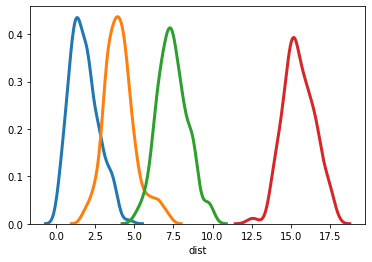

In [9]:
distancias = ['dist2', 'dist8', 'dist32', 'dist128']

for distancia in distancias:
    subset = data_dist[data_dist['hue'] == distancia]
    
    # Draw the density plot
    sns.distplot(subset['dist'], hist = False, kde = True, kde_kws = {'linewidth': 3})

A curva em azul é referente às distâncias calculadas em dimensão 2, e a curva em vermelho para os dados calculados em dimensão 128. Conforme a dimensão aumenta podemos reparar que as distâncias entre os pontos também aumentam.

 # Normalizando os dados

In [10]:
norm2 = np.linalg.norm(dist2)
dist2_norm = list(dist2 / norm2)

In [11]:
norm8 = np.linalg.norm(dist8)
dist8_norm = list(dist8 / norm8)

In [12]:
norm32 = np.linalg.norm(dist32)
dist32_norm = list(dist32 / norm32)

In [13]:
norm128 = np.linalg.norm(dist128)
dist128_norm = list(dist128 / norm128)

In [14]:
dist_norm = dist2_norm + dist8_norm + dist32_norm + dist128_norm
hue_norm = ['dist2']*len(dist2) + ['dist8']*len(dist8) + ['dist32']*len(dist32) + ['dist128']*len(dist128)

In [15]:
data_dist_norm = pd.DataFrame([dist_norm, hue_norm]).transpose()
data_dist_norm.columns = ['dist_norm', 'hue']
data_dist_norm

,dist_norm,hue
0,0.0312372,dist2
1,0.0553211,dist2
2,0.0694576,dist2
3,0.0697447,dist2
4,0.0612971,dist2
...,...,...
1515,0.0523275,dist128
1516,0.0459862,dist128
1517,0.0507029,dist128
1518,0.0514263,dist128


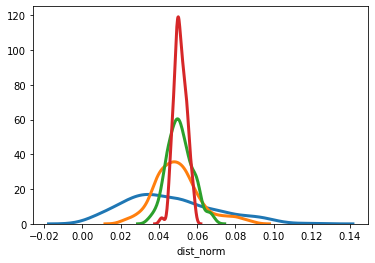

In [16]:
distancias = ['dist2', 'dist8', 'dist32', 'dist128']

for distancia in distancias:
    subset = data_dist_norm[data_dist_norm['hue'] == distancia]
    
    # Draw the density plot
    sns.distplot(subset['dist_norm'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

Normalizando os dados podemos ver que a curva em vermelho (distâncias em dimensão 128) está bem concentrada, indicando que praticamente todos as distâncias assumem valores próximos.